In [23]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from adjustText import adjust_text

#Loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list) 

#Filter for Data Analyst roles
df_DA = df[df['job_title_short'] == 'Data Analyst']

In [24]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot.drop('Total', inplace=True)

# Line Plot

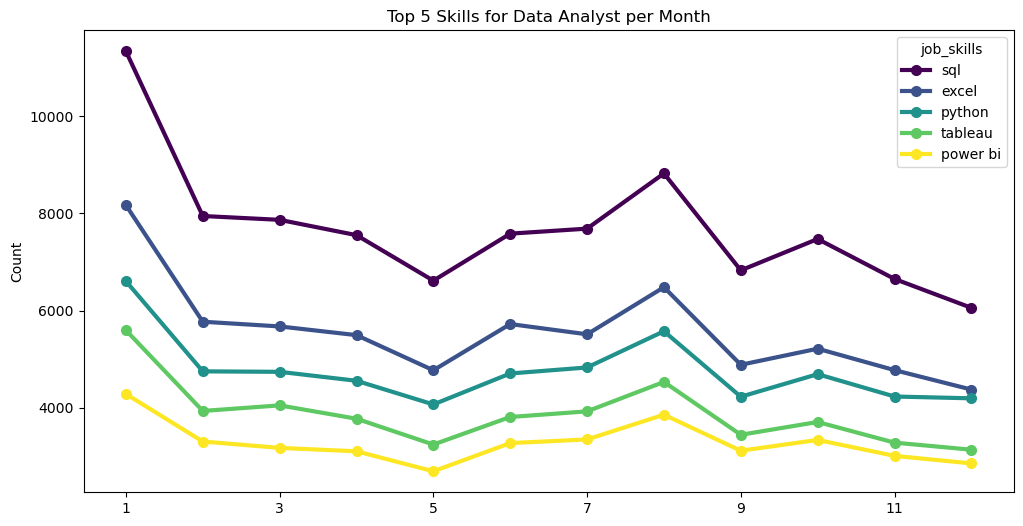

In [25]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=3,
    linestyle='-',     # Options: ':' for dotted, '-' for solid, '--' for dashed, '-.' for dash-dot
    colormap='viridis',     # Options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    marker='o',  # Options: 'o', 'x', 's', '^', 'D', '+', '*', ',', '.', '1', '2', '3', ...
    markersize=7,
    figsize=(12, 6),

)
plt.title('Top 5 Skills for Data Analyst per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

# Scatter Plot

In [26]:
df_exploded = df_DA.explode('job_skills').copy()

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

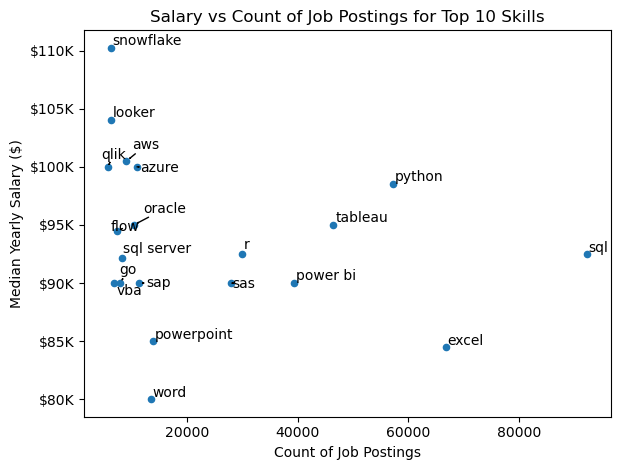

In [38]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($)')
plt.tight_layout()

texts = []

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt, fontsize=10))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.show()